In [113]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [78]:
df_bureau=pd.read_csv('dataset/bureau_data.csv')
df_customer=pd.read_csv('dataset/customers.csv')
df_loans=pd.read_csv('dataset/loans.csv')

In [79]:
print(df_bureau.shape,df_customer.shape,df_loans.shape)

(50000, 8) (50000, 12) (50000, 15)


In [80]:
df=pd.merge(df_loans,df_customer,on='cust_id')
df=pd.merge(df,df_bureau,on='cust_id')

In [81]:
df.shape

(50000, 33)

## CLEANING

##### COLUMNS

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_id                      50000 non-null  object 
 1   cust_id                      50000 non-null  object 
 2   loan_purpose                 50000 non-null  object 
 3   loan_type                    50000 non-null  object 
 4   sanction_amount              50000 non-null  int64  
 5   loan_amount                  50000 non-null  int64  
 6   processing_fee               50000 non-null  float64
 7   gst                          50000 non-null  int64  
 8   net_disbursement             50000 non-null  int64  
 9   loan_tenure_months           50000 non-null  int64  
 10  principal_outstanding        50000 non-null  int64  
 11  bank_balance_at_application  50000 non-null  int64  
 12  disbursal_date               50000 non-null  object 
 13  installment_star

In [83]:
columns_numeric=df.select_dtypes(include=['int64','float64']).columns
columns_categorical=df.select_dtypes(include=['object']).columns

In [84]:
columns_categorical

Index(['loan_id', 'cust_id', 'loan_purpose', 'loan_type', 'disbursal_date',
       'installment_start_dt', 'gender', 'marital_status', 'employment_status',
       'residence_type', 'city', 'state'],
      dtype='object')

#### ROWS

In [85]:
df.isna().sum()

loan_id                         0
cust_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
default                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 62
years_at_current_address        0
city                            0
state                           0
zipcode                         0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_mon

In [86]:
print(df.residence_type.dtype,df.number_of_dependants.dtype)

object int64


In [87]:
df.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [103]:
mode_residence_type=df.residence_type.mode()[0]
mode_residence_type

'Owned'

In [109]:
df['residence_type'].fillna(mode_residence_type,inplace=True)

In [110]:
df.isnull().sum()

loan_id                        0
cust_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_date                 0
installment_start_dt           0
default                        0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd 

In [111]:
df.duplicated().sum()

0

In [112]:
import math

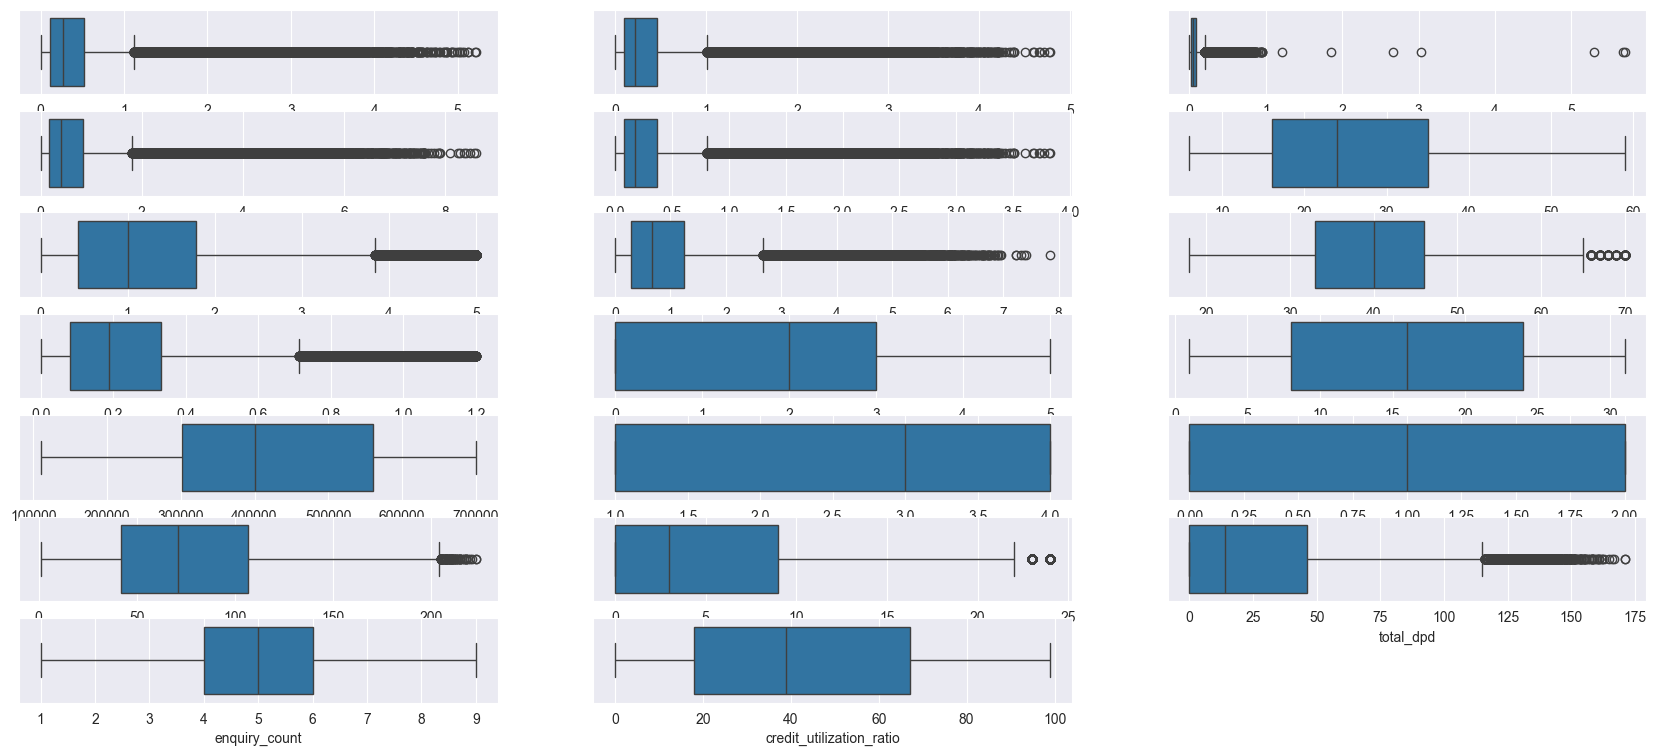

In [126]:
col =3
rows=math.ceil(len(columns_numeric)/3)
axs_len=rows*col
fig,axs=plt.subplots(nrows=rows, ncols=col,figsize=(3*rows,3*col))
axs=axs.flatten()
for ax,col in zip(axs,columns_numeric):

    sns.boxplot(x=df[col],ax=ax)
    # ax.set_title(col)
for j in range(len(columns_numeric),axs_len):
    axs[j].axis('off')
plt.show()

###### HISTOGRAM

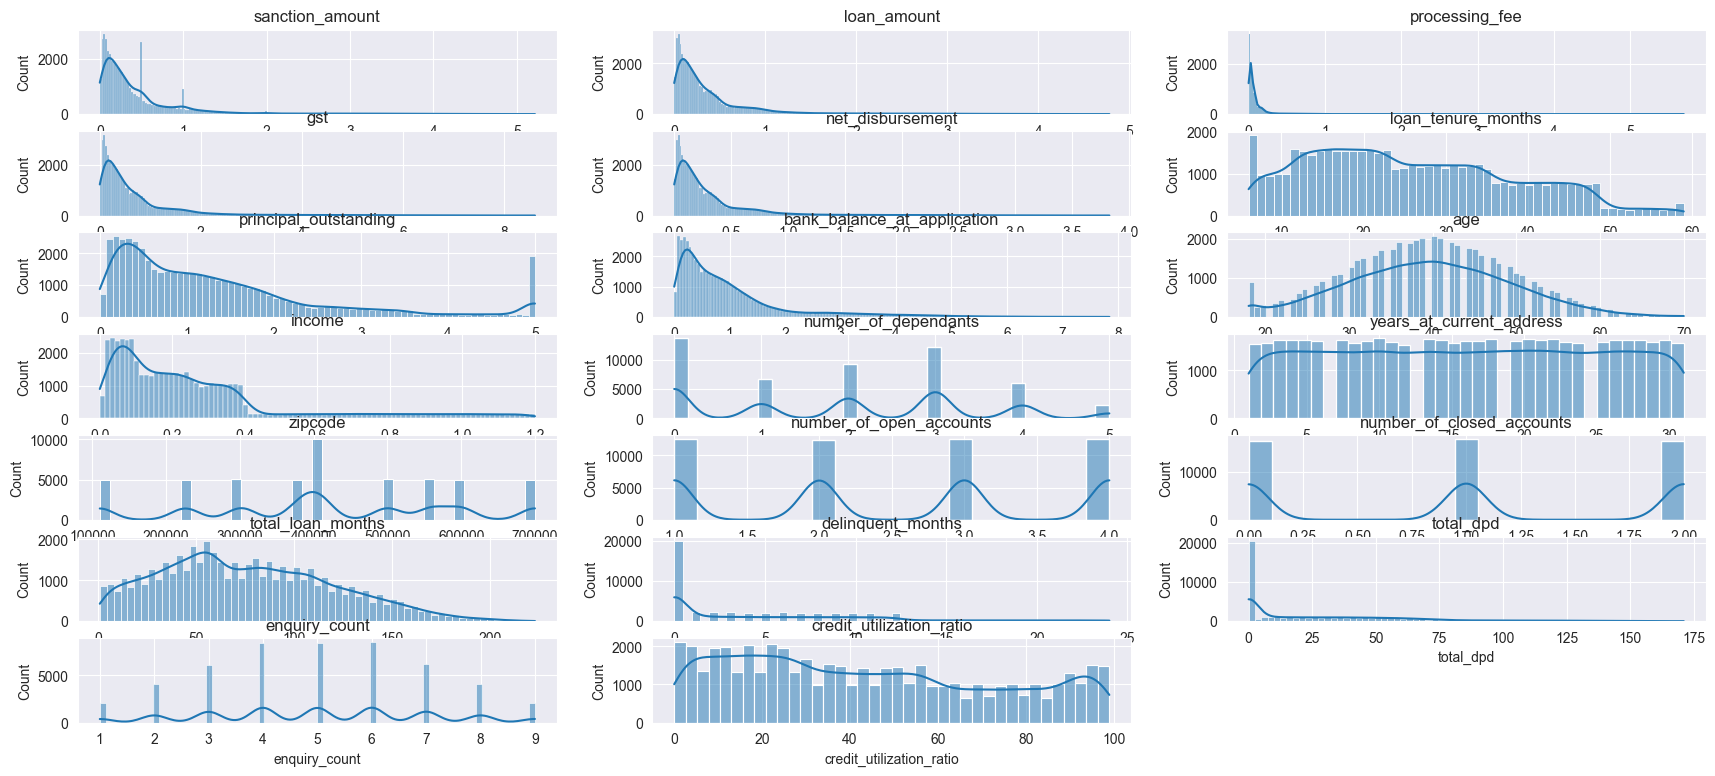

In [128]:
col =3
rows=math.ceil(len(columns_numeric)/3)
axs_len=rows*col
fig,axs=plt.subplots(nrows=rows, ncols=col,figsize=(3*rows,3*col))
axs=axs.flatten()
for ax,col in zip(axs,columns_numeric):

    sns.histplot(x=df[col],ax=ax,kde=True)
    ax.set_title(col)
for j in range(len(columns_numeric),axs_len):
    axs[j].axis('off')
plt.show()